In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
photo1 = cv2.imread("team.jpeg") 

In [24]:
m, n, _ = photo1.shape
ldp_photo = []
gray_scale = cv2.cvtColor(photo1, cv2.COLOR_BGR2GRAY)

# converting image to ldp
for i in range(0, m):
    for j in range(0, n):
        # ldp_photo.append({"x": i, "y": j, "picture": gray_scale})
        ldp_photo.append([i, j])

input_data = np.array(ldp_photo)
# ldp_photo = ldp_photo.reshape(m,n)


In [25]:
# assign bit according to degree and neighbouring pixel
def assign_bit(picture, x, y, c1, c2, d):
    # a and b are 1 if increasing and 0 if decreasing
    if (d == 0):
        a = 0
        b = 0
        try:
            if picture[c1][c2+1] >= picture[c1][c2]:
                a = 1
            if picture[x][y+1] >= picture[x][y]:
                b = 1
        except:
            pass
    elif (d == 45):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2+1] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y+1] >= picture[x][y]:
                b = 1
        except:
            pass
    elif (d == 90):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y] >= picture[x][y]:
                b = 1
        except:
            pass
    elif (d == 135):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2-1] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y-1] >= picture[x][y]:
                b = 1
        except:
            pass
        
    if (a == b):  # if monotonically increasing or decreasing than 0
        return "0"
    else:  # if turning point
        return "1"

In [26]:
def local_der_val(input):  # calculating local derivative pattern value of a pixel
    
    picture = gray_scale
    x = input[0]
    y = input[1]

    thirtytwo_bit_binary = []
    centre = picture[x][y]
    c1 = x
    c2 = y
    decimal_val = 0
    # starting from top left,assigning bit to pixels clockwise at 0 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 0))

    # starting from top left,assigning bit to pixels clockwise at 45 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 45))

    # starting from top left,assigning bit to pixels clockwise at 90 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 90))

    # starting from top left,assigning bit to pixels clockwise at 135 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 135))

    str1 = ""
    l = str1.join(thirtytwo_bit_binary)  # 32 bit binary number
    decimal_val = int(l, 2)  # 32 bit binary to decimal number
    # print(thirtytwo_bit_binary)
    # print(l)
    # print(decimal_val)
    return decimal_val

In [27]:
def ldp(photo):
  
  m, n, _ = photo.shape 
  # converting image to grayscale
  # gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
  # ldp_photo = np.zeros((m, n),np.uint8)
  # ldp_photo = np.zeros((m, n))
  # converting image to ldp
  # for i in range(0, m):
      # for j in range(0, n):
  # print(input_data.shape)
  # print(isinstance(input_data,np.ndarray))

  ldp_photo = np.apply_along_axis(local_der_val, 1, input_data)
  
  # local_der_val(gray_scale, i, j)

  return ldp_photo


In [31]:
l1 = ldp(photo1)
len(l1)



1228800

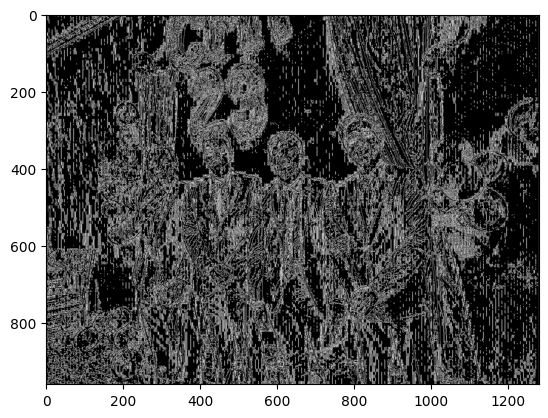

array([[2148437961,  940445324, 2601389614, ...,       2572,  943195150,
             14910],
       [  14705304,  954261731, 3152077024, ...,       5603,  943257056,
             15808],
       [       824,  939524227, 3137339392, ...,     807297,  943611648,
             16640],
       ...,
       [2197865240,  134250691,  469762176, ...,          0,  943194112,
             14392],
       [2197848888,  402653315, 3271557128, ...,          0,  943194112,
             14392],
       [2399174974, 1040187521, 2164260880, ...,  235802126, 1044254222,
             15934]], dtype=int64)

In [30]:
l2 = l1.reshape(m,n)
l2.shape
plt.imshow(l2, cmap="gray")
plt.show()
l2


In [20]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1]) * 0.5


b = np.array([[1, 3], [4, 6], [7, 9]])
np.apply_along_axis(my_func, 1, b)
b.shape
# np.apply_along_axis(my_func, 1, b)


(3, 2)

In [ ]:
plt.imshow(l1, cmap="gray")
plt.show()


In [5]:
def ldp(photo):
  def assign_bit(picture, x, y, c1,c2,d):  #assign bit according to degree and neighbouring pixel
    #a and b are 1 if increasing and 0 if decreasing
    if (d==0):
      a = 0    
      b =0  
      try:
        if picture[c1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x][y+1] >= picture[x][y]:
          b= 1         
      except:
        pass
    if (d==45):
      a = 0    
      b =0  
      try:
        if picture[c1-1][c2+1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y+1] >= picture[x][y]:
          b= 1
      except: 
        pass
    if (d==90):
      a = 0   
      b =0  
      try:
        if picture[c1-1][c2] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y] >= picture[x][y]:
          b= 1
      except:
        pass
    if (d==135):
      a = 0    
      b =0 
      try:
        if picture[c1-1][c2-1] >= picture[c1][c2]:
          a= 1
        if picture[x-1][y-1] >= picture[x][y]:
          b= 1
      except:
        pass
    if (a==b): #if monotonically increasing or decreasing than 0
      return "0"
    else:      #if turning point 
      return "1"
    return bit
  def local_der_val(picture, x, y):  #calculating local derivative pattern value of a pixel
    thirtytwo_bit_binary = []
    centre = picture[x][y] 
    c1=x
    c2=y
    decimal_val = 0
    #starting from top left,assigning bit to pixels clockwise at 0 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,0 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,0)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,0)) 
    
    #starting from top left,assigning bit to pixels clockwise at 45 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,45)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,45)) 
    
    #starting from top left,assigning bit to pixels clockwise at 90 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,90 )) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,90)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,90)) 

    #starting from top left,assigning bit to pixels clockwise at 135 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y,c1,c2,135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y + 1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1,c1,c2,135)) 
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1,c1,c2,135)) 

    str1 = ""   
    l=str1.join(thirtytwo_bit_binary)#32 bit binary number
    decimal_val=int(l,2)   #32 bit binary to decimal number
    return decimal_val 
  m, n, _ = photo.shape 
  
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  # ldp_photo = np.zeros((m, n),np.uint8) 
  ldp_photo = np.zeros((m, n)) 
  # converting image to ldp
  for i in range(0,m): 
      for j in range(0,n): 
          ldp_photo[i, j] = local_der_val(gray_scale, i, j) 
 
  return ldp_photo
 

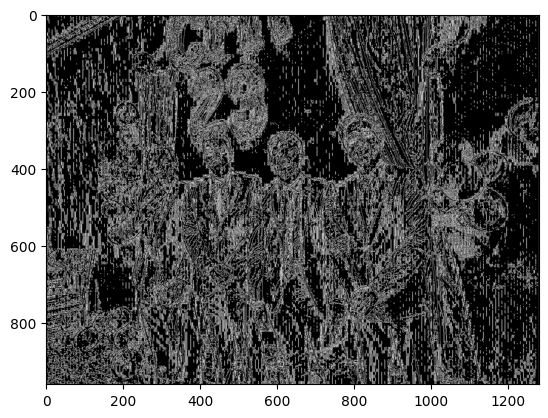

array([[2.14843796e+09, 9.40445324e+08, 2.60138961e+09, ...,
        2.57200000e+03, 9.43195150e+08, 1.49100000e+04],
       [1.47053040e+07, 9.54261731e+08, 3.15207702e+09, ...,
        5.60300000e+03, 9.43257056e+08, 1.58080000e+04],
       [8.24000000e+02, 9.39524227e+08, 3.13733939e+09, ...,
        8.07297000e+05, 9.43611648e+08, 1.66400000e+04],
       ...,
       [2.19786524e+09, 1.34250691e+08, 4.69762176e+08, ...,
        0.00000000e+00, 9.43194112e+08, 1.43920000e+04],
       [2.19784889e+09, 4.02653315e+08, 3.27155713e+09, ...,
        0.00000000e+00, 9.43194112e+08, 1.43920000e+04],
       [2.39917497e+09, 1.04018752e+09, 2.16426088e+09, ...,
        2.35802126e+08, 1.04425422e+09, 1.59340000e+04]])

In [19]:
l1=ldp(photo1)
plt.imshow(l1, cmap ="gray") 
plt.show() 
l1